In [1]:
import pandas as pd
import numpy as np
import csv
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from pymongo import MongoClient
client = MongoClient('localhost', 27017)
db = client.ncaa
teams = db.teams2

In [2]:
df = pd.read_csv('MARCH_MADNESS_DATA.csv')
df.head()

,YEAR,ROUND,REGION,T1ID,T1SEED,T1SCORE,T1NAME,T1PTS,T1REB,T1AST,...,T2SOS,T2SOR,T2REC,T2HREC,T2AREC,SEEDDIFF,BPIDIFF,SOSDIFF,SORDIFF,WINNER
0,2008,1.0,1.0,153,1,113,North Carolina Tar Heels,88.7,44.2,16.7,...,246,182,0.559,0.5,0.533,-15,-169,-237,-181,0
1,2008,1.0,1.0,2633,2,72,Tennessee Volunteers,83.0,38.1,18.2,...,223,141,0.636,0.667,0.588,-13,-143,-204,-136,0
2,2008,1.0,1.0,97,3,79,Louisville Cardinals,71.9,37.8,14.8,...,235,82,0.735,0.688,0.786,-11,-122,-221,-70,0
3,2008,1.0,1.0,265,4,71,Washington State Cougars,67.1,29.2,13.7,...,129,90,0.647,0.786,0.455,-9,-68,-108,-77,0
4,2008,1.0,1.0,87,5,68,Notre Dame Fighting Irish,80.6,41.6,18.9,...,179,96,0.676,0.929,0.417,-7,-48,-127,-79,0


In [3]:
df = df.drop(columns=['T1NAME','T2NAME','T1SCORE','T2SCORE','REGION','YEAR','ROUND',
                      'T1ID','T1HW','T1HL','T1AW','T1AL','T1HREC','T1AREC',
                      'T2ID','T2HW','T2HL','T2AW','T2AL','T2HREC','T2AREC',])
#                       'T1SEED','T2SEED','T1BPI','T2BPI','T1SOS','T2SOS','T1SOR','T2SOR'])

In [4]:
df = df.dropna()

In [9]:
x = df.iloc[:,:-1]
y = df.WINNER

In [10]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=99)

In [11]:
### Logistic Regression
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(train_x, train_y)

### Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(train_x, train_y)

### SVM
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

svmp = make_pipeline(StandardScaler(), SVC(kernel='poly', probability=True))
svml = make_pipeline(StandardScaler(), SVC(kernel='linear', probability=True))

svmp.fit(train_x, train_y)
svml.fit(train_x, train_y)

### Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(train_x, train_y)

### ANN
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(hidden_layer_sizes = (50,100,25,20))
ann.fit(train_x, train_y)

# ### Sequential
# from keras.models import Sequential
# from keras.layers import Dense, Dropout
# snn = Sequential()
# snn.add(Dense(25, input_dim=39, activation='relu'))
# snn.add(Dropout(0.2))
# snn.add(Dense(50, activation='relu'))
# snn.add(Dropout(0.2))
# snn.add(Dense(25, activation='relu'))
# snn.add(Dropout(0.1))
# snn.add(Dense(10, activation='relu'))
# snn.add(Dropout(0.1))
# snn.add(Dense(1, activation='sigmoid'))
# snn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# snn.fit(train_x, train_y, epochs=50, batch_size=16)
### XGBoost
# import xgboost as xgb
# xgb = xgb.XGBClassifier()
# xgb.fit(train_x.drop(columns=['T1ID','T2ID']), train_y)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(hidden_layer_sizes=(50, 100, 25, 20))

In [12]:
# ### Random Forest
# from sklearn.model_selection import RandomizedSearchCV
# random_grid = {}
# random_grid['n_estimators'] = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# random_grid['max_features'] = ['auto', 'sqrt']
# random_grid['max_depth'] = [int(x) for x in np.linspace(10, 110, num = 11)]
# random_grid['max_depth'].append(None)
# random_grid['min_samples_split'] = [2, 5, 10]
# random_grid['min_samples_leaf'] = [1, 2, 4]
# random_grid['bootstrap'] = [True, False]
# rf = RandomForestClassifier()
# rf_random = RandomizedSearchCV(
#     estimator=rf, 
#     param_distributions=random_grid, 
#     n_iter=500, cv=3, verbose=2,
#     n_jobs=-1)
# rf_random.fit(train_x, train_y)

In [13]:
# rf_random.best_params_

In [14]:
# {'n_estimators': 1600,
#  'min_samples_split': 5,
#  'min_samples_leaf': 4,
#  'max_features': 'auto',
#  'max_depth': 60,
#  'bootstrap': False}

In [15]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
    n_estimators=1500,
#     min_samples_split=5, 
    min_samples_leaf=4,
    max_features='auto',
    max_depth=50,
    bootstrap=True)
rf.fit(train_x, train_y)

RandomForestClassifier(max_depth=50, min_samples_leaf=4, n_estimators=1500)

In [16]:
from sklearn.metrics import accuracy_score, log_loss
### Logistic Regression
log_pred = log.predict(test_x)
log_acc = accuracy_score(test_y, log_pred)
log_predprob = log.predict_proba(test_x)
print(f"{'Logistic Regression':<20} ==> {round(log_acc * 100, 2)}")
print(f"{'Log Loss':<20} ==> {round(log_loss(test_y, log_predprob), 3)}")
print()

### Naive Bayes
nb_pred = nb.predict(test_x)
nb_acc = accuracy_score(test_y, nb_pred)
nb_predprob = nb.predict_proba(test_x)
print(f"{'Naive Bayes':<20} ==> {round(nb_acc * 100, 2)}")
print(f"{'Log Loss':<20} ==> {round(log_loss(test_y, nb_predprob), 3)}")
print()

### SVM
svmp_pred = svmp.predict(test_x)
svmp_acc = accuracy_score(test_y, svmp_pred)
svmp_predprob = svmp.predict_proba(test_x)
print(f"{'SVM (Poly)':<20} ==> {round(svmp_acc * 100, 2)}")
print(f"{'Log Loss':<20} ==> {round(log_loss(test_y, svmp_predprob), 3)}")
print()

svml_pred = svml.predict(test_x)
svml_acc = accuracy_score(test_y, svml_pred)
svml_predprob = svml.predict_proba(test_x)
print(f"{'SVM (Linear)':<20} ==> {round(svml_acc * 100, 2)}")
print(f"{'Log Loss':<20} ==> {round(log_loss(test_y, svml_predprob), 3)}")
print()

### Decision Tree
dt_pred = dt.predict(test_x)
dt_acc = accuracy_score(test_y, dt_pred)
dt_predprob = dt.predict_proba(test_x)
print(f"{'Decision Tree':<20} ==> {round(dt_acc * 100, 2)}")
print(f"{'Log Loss':<20} ==> {round(log_loss(test_y, dt_predprob), 3)}")
print()

### Random Forest
rf_pred = rf.predict(test_x)
rf_acc = accuracy_score(test_y, rf_pred)
rf_predprob = rf.predict_proba(test_x)
print(f"{'Random Forest':<20} ==> {round(rf_acc * 100, 2)}")
print(f"{'Log Loss':<20} ==> {round(log_loss(test_y, rf_predprob), 3)}")
print()
# rf_pred_train = rf.predict(train_x)
# rf_acc_train = accuracy_score(train_y, rf_pred_train)
# rf_predprob_train = rf.predict_proba(train_x)
# print(f"{'Random Forest (train)':<20} ==> {round(rf_acc * 100, 2)}")
# print(f"{'Log Loss (train)':<20} ==> {round(log_loss(train_y, rf_predprob_train), 3)}")
# print()

### XGBoost
# xgb_pred = xgb.predict(test_x)
# xgb_acc = accuracy_score(test_y, rf_pred)
# xgb_predprob = xgb.predict_proba(test_x)
# print(f"{'XGBoost':<20} ==> {round(xgb_acc * 100, 2)}")
# print(f"{'Log Loss':<20} ==> {round(log_loss(test_y, xgb_predprob), 3)}")
# print()

### ANN
ann_pred = ann.predict(test_x)
ann_acc = accuracy_score(test_y, ann_pred)
ann_predprob = ann.predict_proba(test_x)
print(f"{'Neural Net':<20} ==> {round(ann_acc * 100, 2)}")
print(f"{'Log Loss':<20} ==> {round(log_loss(test_y, ann_predprob), 3)}")
print()

# ### SNN
# # snn_pred = snn.predict(test_x)
# # snn_acc = accuracy_score(test_y, snn_pred)
# _, snn_acc = snn.evaluate(test_x, test_y)
# # snn_predprob = snn.predict_proba(test_x)
# print(f"{'Neural Net':<20} ==> {round(snn_acc * 100, 2)}")
# # print(f"{'Log Loss':<20} ==> {round(log_loss(test_y, snn_predprob), 3)}")


Logistic Regression  ==> 86.64
Log Loss             ==> 0.303

Naive Bayes          ==> 68.02
Log Loss             ==> 1.692

SVM (Poly)           ==> 76.11
Log Loss             ==> 0.525

SVM (Linear)         ==> 85.43
Log Loss             ==> 0.297

Decision Tree        ==> 65.18
Log Loss             ==> 12.026

Random Forest        ==> 79.76
Log Loss             ==> 0.436

Neural Net           ==> 79.76
Log Loss             ==> 0.507



In [17]:
# sub = pd.read_csv('./data/MSampleSubmissionStage1.csv')

In [18]:
# sub.head()

In [19]:
# new_ids_inv = {}
# for id in new_ids:
#     if new_ids[id]['new_ids'][0] not in new_ids_inv:
#         new_ids_inv[new_ids[id]['new_ids'][0]] = id
#     else:
#         raise KeyError

In [20]:
# model_input = pd.read_csv('MODEL_INPUT.csv')
# model_input = model_input.drop(columns=['T1NAME','T2NAME','T1SCORE','T2SCORE',
#                       'T1ID','T2ID'])#,'T1SEED','T2SEED','T1SOR','T2SOR','T1SOS','T2SOS','T1BPI','T2BPI'])


In [21]:
# x_input = model_input.iloc[:,:-1]

In [22]:
# x_input

In [23]:
# svm_final_pred = svml.predict_proba(x_input)
# rf_final_pred = rf.predict_proba(x_input)

In [24]:
# svm_final_pred

In [25]:
# rf_final_pred

In [26]:
# sub = sub.drop(columns=['Pred'])
# sub['Pred'] = svm_final_pred[:,0]
# sub.to_csv('svm_submission1.csv', index=False)

In [27]:
# sub = sub.drop(columns=['Pred'])
# sub['Pred'] = rf_final_pred[:,0]
# sub.to_csv('rf_submission1.csv', index=False)

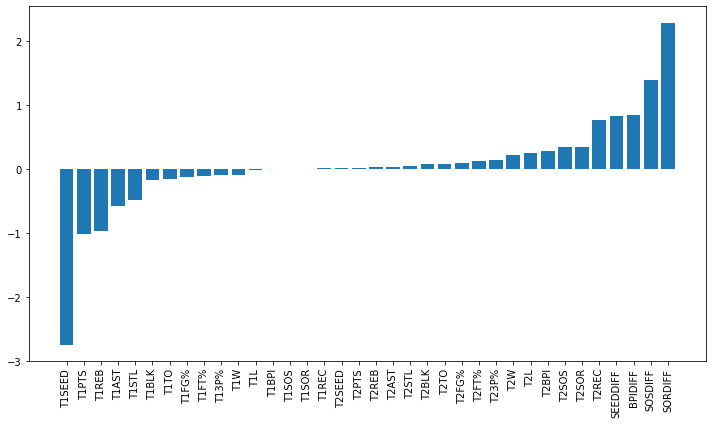

In [29]:

x = np.sort(svml.named_steps["svc"].coef_.flatten())
feature_names = list(df.columns[:-1])
fig, ax = plt.subplots(figsize=(10, 6))
plt.bar(feature_names, x)
plt.xticks(rotation='vertical')
fig.tight_layout()

In [30]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

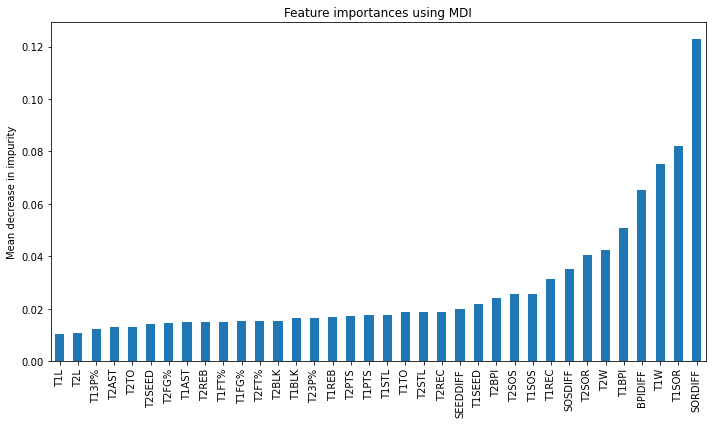

In [31]:
feature_names = list(df.columns[:-1])
forest_importances = pd.Series(importances, index=feature_names).sort_values()

fig, ax = plt.subplots(figsize=(10, 6))
forest_importances.plot.bar( ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [49]:
spell = pd.read_csv('./data/MTeamSpellings2.csv', encoding='cp1252')
spell.head()

,TeamNameSpelling,TeamID
0,a&m-corpus chris,1394
1,a&m-corpus christi,1394
2,abilene chr,1101
3,abilene christian,1101
4,abilene-christian,1101


In [50]:
ids = pd.read_csv('./id_name.csv')
ids.head()

,Year,Round,Region Number,Region Name,Seed,Score,Team1,Team2,Score.1,Seed.1,team1id,team2id
0,2008,1.0,1.0,East,1,113,North Carolina,Mount St Marys,74,16,153,116
1,2008,1.0,1.0,East,2,72,Tennessee,American,57,15,2633,44
2,2008,1.0,1.0,East,3,79,Louisville,Boise St,61,14,97,68
3,2008,1.0,1.0,East,4,71,Washington St,Winthrop,40,13,265,2737
4,2008,1.0,1.0,East,5,68,Notre Dame,George Mason,50,12,87,2244


In [51]:
new_ids = {}
for idx1, row1 in ids.iterrows():
    if idx1 % 100 == 0:
        print(f"row {idx1}/{ids.shape[0]}")
    team1name = row1['Team1'].lower().replace(' ', '')
    team2name = row1['Team2'].lower().replace(' ', '')
    team1id = row1['team1id']
    team2id = row1['team2id']
    if team1id not in new_ids:
        new_ids[team1id] = {'name':team1name, 'new_ids':[]}
    if team2id not in new_ids:
        new_ids[team2id] = {'name':team2name, 'new_ids':[]}
    for idx2, row2 in spell.iterrows():
        if row2['TeamNameSpelling'].lower().replace(' ', '') == team1name:
            if row2['TeamID'] not in new_ids[team1id]['new_ids']:
                new_ids[team1id]['new_ids'].append(row2['TeamID'])
        if row2['TeamNameSpelling'].lower().replace(' ', '') == team2name:
            if row2['TeamID'] not in new_ids[team2id]['new_ids']:
                new_ids[team2id]['new_ids'].append(row2['TeamID'])

row 0/823
row 100/823
row 200/823
row 300/823
row 400/823
row 500/823
row 600/823
row 700/823
row 800/823


In [52]:
id_set = set(list(ids.team1id) + list(ids.team2id))
name_set = set(list(ids.Team1) + list(ids.Team2))
not_found = []
for name in name_set:
    found = False
    for id in id_set:
        if new_ids[id]['name'] == name.lower().replace(' ',''):
            found = True
    if not found:
        print(name)
        not_found.append(name)

Lafayette
Oklahoma State
Michigan State
Wichita State
UC Irvine
Utah State
Mount St. Mary's
Florida State
Morehead State
Oregon State
UConn
St Marys
Ohio State
San Diego State
Cleveland State
Norfolk State
UC Santa Barbara
St. Bonaventure
Utah


In [53]:
for name in not_found:
    print(f"========== {name:<20} ==========")
    subset_ids = ids[(ids.Team1 == name) | (ids.Team2 == name)][['Year','Team1','Team2','team1id','team2id']]
    print(subset_ids)
    for idx, row in subset_ids.iterrows():
        print(new_ids[row.team1id])
        print(new_ids[row.team2id])
    print()

========== Lafayette            ==========
     Year      Team1      Team2  team1id  team2id
457  2015  Villanova  Lafayette      222      322
{'name': 'villanova', 'new_ids': [1437]}
{'name': 'louisianalafayette', 'new_ids': [1248]}

========== Oklahoma State       ==========
     Year         Team1           Team2  team1id  team2id
765  2021       Liberty  Oklahoma State     2335      197
796  2021  Oregon State  Oklahoma State      204      197
{'name': 'liberty', 'new_ids': [1251]}
{'name': 'oklahomast', 'new_ids': [1329]}
{'name': 'oregonst', 'new_ids': [1333]}
{'name': 'oklahomast', 'new_ids': [1329]}

========== Michigan State       ==========
     Year Team1           Team2  team1id  team2id
759  2021  UCLA  Michigan State       26      127
{'name': 'ucla', 'new_ids': [1417]}
{'name': 'michiganst', 'new_ids': [1277]}

========== Wichita State        ==========
     Year  Team1          Team2  team1id  team2id
757  2021  Drake  Wichita State     2181     2724
{'name': 'drake', '

In [54]:
# Utah - 254
# St Marys - 2608
new_ids['254'] = {'name':'utah', 'new_ids':[1428]}
new_ids['2608'] = {'name': 'st marys', 'new_ids':[1388]}

In [55]:
# spell[spell.TeamNameSpelling.str.contains('saint')].head()

In [56]:
new_ids[2603]['new_ids'] = [1386]
new_ids[2239]['new_ids'] = [1168]
new_ids[2309]['new_ids'] = [1245]
new_ids[251]['new_ids'] = [1400]
new_ids[2390]['new_ids'] = [1274]
new_ids[2400]['new_ids'] = [1290]
new_ids[2449]['new_ids'] = [1295]
new_ids[2463]['new_ids'] = [1169]
new_ids[2193]['new_ids'] = [1190]
new_ids[2617]['new_ids'] = [1372]
new_ids[2029]['new_ids'] = [1115]
new_ids[112358]['new_ids'] = [1254]
new_ids[2612]['new_ids'] = [1389]
new_ids[2599]['new_ids'] = [1385]
new_ids[2571]['new_ids'] = [1355]
new_ids[2466]['new_ids'] = [1322]
new_ids[270]['new_ids'] = [1454]
new_ids[2934]['new_ids'] = [1167]
new_ids[2739]['new_ids'] = [1453]
new_ids[2393]['new_ids'] = [1292]
new_ids[2031]['new_ids'] = [1114]

In [57]:
# for idx, row in ids[ids.Team1 == 'Utah'].iterrows():
#     ids.loc[idx, 'team1id'] = 254

In [58]:
# ids[ids.Team1 == 'Utah']

In [59]:
# ids.to_csv('id_name_4.csv', index=False)

In [60]:
ids = pd.read_csv('./2022Teams.csv', header=None)
ids.columns = ['Name']
ids.head()

,Name
0,Texas Southern
1,TexasAM CC
2,Wyoming
3,Indiana
4,Wright St


In [61]:
team_ids = {}
for idx1, row1 in ids.iterrows():
    if idx1 % 100 == 0:
        print(f"row {idx1}/{ids.shape[0]}")
    teamName = ids.iloc[idx1,0]
    teamName_ = teamName.lower().replace(' ', '')
    for idx2, row2 in spell.iterrows():
        if row2['TeamNameSpelling'].lower().replace(' ', '') == teamName_:
                team_ids[teamName] = row2['TeamID']
                ids.loc[idx1,'ID'] = row2['TeamID']

row 0/68


In [62]:
ids[(ids.Name == 'NM St') | (ids.Name == 'Deleware') | (ids.Name == 'SDSU') | (ids.Name == 'TexasAM CC') | (ids.Name == 'St Marys') | (ids.Name == 'St Peters') | (ids.Name == 'South Dakota St')]



,Name,ID
1,TexasAM CC,NaN
13,NM St,NaN
27,St Marys,NaN
37,St Peters,NaN
52,Deleware,NaN
54,SDSU,NaN
59,South Dakota St,NaN


In [63]:
ids.loc[1,'ID'] = 1394
ids.loc[13,'ID'] = 1308
ids.loc[27,'ID'] = 1388
ids.loc[37,'ID'] = 1389
ids.loc[52,'ID'] = 1174
ids.loc[54,'ID'] = 1361
ids.loc[59,'ID'] = 1355


In [64]:
new_ids_inv = {}
for id in new_ids:
    new_ids_inv[new_ids[id]['new_ids'][0]] = id

In [65]:
for idx, row in ids.iterrows():
    if row.ID not in new_ids_inv:
        print(row.Name, row.ID)

TexasAM CC 1394.0
Bryant 1136.0
Montana St 1286.0
San Francisco 1362.0
Longwood 1255.0


In [66]:
new_ids_inv[1394] = 357
new_ids_inv[1136] = 2803
new_ids_inv[1286] = 147
new_ids_inv[1388] = 2608
new_ids_inv[1362] = 2539
new_ids_inv[1255] = 2344

In [67]:
ids.to_csv('2022TeamsID.csv', index=False)

In [133]:
games_2022 = pd.read_csv('./data_2/MDataFiles_Stage2/MSampleSubmissionStage2.csv')

In [135]:
games_2022.head()

,ID,Pred
0,2022_1103_1104,0.5
1,2022_1103_1112,0.5
2,2022_1103_1116,0.5
3,2022_1103_1120,0.5
4,2022_1103_1124,0.5


In [139]:
seeds_2022 = pd.read_csv('./data_2/MDataFiles_Stage2/MNCAATourneySeeds.csv')

In [141]:
seeds_2022.head()

,Season,Seed,TeamID
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228
3,1985,W04,1260
4,1985,W05,1374


In [149]:
seeds_2022[(seeds_2022.Season == 2022) & (seeds_2022.TeamID == int(1103))].iloc[0,1]

'W13'

In [151]:
with open('./MODEL_INPUT_2022.csv', 'w') as f:
    f.write('T1ID,T1SEED,T1SCORE,T1NAME,T1PTS,T1REB,T1AST,T1STL,T1BLK,T1TO,T1FG%,T1FT%,T13P%,T1W,T1L,T1BPI,T1SOS,T1SOR,T1REC,')
    f.write('T2ID,T2SEED,T2SCORE,T2NAME,T2PTS,T2REB,T2AST,T2STL,T2BLK,T2TO,T2FG%,T2FT%,T23P%,T2W,T2L,T2BPI,T2SOS,T2SOR,T2REC,')
    f.write('SEEDDIFF,BPIDIFF,SOSDIFF,SORDIFF\n')
    for idx, row in games_2022.iterrows():
        year = row['ID'][:4]
        t1id_ = row['ID'][5:9]
        t2id_ = row['ID'][10:]
        try:
            team1 = teams.find_one({'year': year, 'id_num': str(new_ids_inv[int(t1id_)])})
        except KeyError:
            team1 = teams.find_one({'ID': '99999999'})
        try:
            team2 = teams.find_one({'year': year, 'id_num': str(new_ids_inv[int(t2id_)])})
        except KeyError:
            team2 = teams.find_one({'ID': '99999999'})

        ### TEAM 1 INFO ###
        t1id = team1['id_num']
        t1seed = seeds_2022[(seeds_2022.Season == 2022) & (seeds_2022.TeamID == int(t1id_))].iloc[0,1][1:3]
        t1score = 0
        t1name = team1['name']
        t1PTS = team1['stats']['PTS']
        t1REB = team1['stats']['REB']
        t1AST = team1['stats']['AST']
        t1STL = team1['stats']['STL']
        t1BLK = team1['stats']['BLK']
        t1TOV = team1['stats']['TO']
        t1FG = team1['stats']['FG%']
        t1FT = team1['stats']['FT%']
        t13P = team1['stats']['3P%']
        t1w = team1['record']['record'].split('-')[0]
        t1l = team1['record']['record'].split('-')[1]
        if int(t1w) > 0 and int(t1l) > 0:
            t1rec = round(int(t1w) / (int(t1w) + int(t1l)),3)
        else:
            t1rec = 0
        t1bpi = team1['ranking']['bpi']
        t1sos = team1['ranking']['sos']
        t1sor = team1['ranking']['sor']
        f.write(f'{t1id},{t1seed},{t1score},{t1name},{t1PTS},{t1REB},{t1AST},{t1STL},{t1BLK},{t1TOV},{t1FG},{t1FT},{t13P},{t1w},{t1l},{t1bpi},{t1sos},{t1sor},{t1rec},')

        ### TEAM 2 INFO ###
        t2id = team2['id_num']
        t2seed = seeds_2022[(seeds_2022.Season == 2022) & (seeds_2022.TeamID == int(t2id_))].iloc[0,1][1:3]
        t2score = 0
        t2name = team2['name']
        t2PTS = team2['stats']['PTS']
        t2REB = team2['stats']['REB']
        t2AST = team2['stats']['AST']
        t2STL = team2['stats']['STL']
        t2BLK = team2['stats']['BLK']
        t2TOV = team2['stats']['TO']
        t2FG = team2['stats']['FG%']
        t2FT = team2['stats']['FT%']
        t23P = team2['stats']['3P%']
        t2w = team2['record']['record'].split('-')[0]
        t2l = team2['record']['record'].split('-')[1]
        if int(t2w) > 0 and int(t2l) > 0:
            t2rec = round(int(t2w) / (int(t2w) + int(t2l)),3)
        else:
            t2rec = 0
        t2bpi = team2['ranking']['bpi']
        t2sos = team2['ranking']['sos']
        t2sor = team2['ranking']['sor']
        f.write(f'{t2id},{t2seed},{t2score},{t2name},{t2PTS},{t2REB},{t2AST},{t2STL},{t2BLK},{t2TOV},{t2FG},{t2FT},{t23P},{t2w},{t2l},{t2bpi},{t2sos},{t2sor},{t2rec},')

        winner = 0 if int(t1score) > int(t2score) else 1
        seed_diff = int(t1seed) - int(t2seed)
        bpi_diff = int(t1bpi) - int(t2bpi)
        sos_diff = int(t1sos) - int(t2sos)
        sor_diff = int(t1sor) - int(t2sor)
        f.write(f'{seed_diff},{bpi_diff},{sos_diff},{sor_diff}\n')

In [154]:
x_FINAL = pd.read_csv('MODEL_INPUT_2022.csv')
x_FINAL = x_FINAL.drop(columns=['T1NAME','T2NAME','T1SCORE','T2SCORE',
                      'T1ID','T2ID',])
#                       'T1SEED','T2SEED','T1BPI','T2BPI','T1SOS','T2SOS','T1SOR','T2SOR'])

In [155]:
x_FINAL

,T1SEED,T1PTS,T1REB,T1AST,T1STL,T1BLK,T1TO,T1FG%,T1FT%,T13P%,...,T2W,T2L,T2BPI,T2SOS,T2SOR,T2REC,SEEDDIFF,BPIDIFF,SOSDIFF,SORDIFF
0,13,71.2,35.0,11.9,5.8,3.3,11.5,46.2,68.7,35.7,...,19,13,21,1,27,0.594,7,81,274,86
1,13,71.2,35.0,11.9,5.8,3.3,11.5,46.2,68.7,35.7,...,31,3,3,73,2,0.912,12,99,202,111
2,13,71.2,35.0,11.9,5.8,3.3,11.5,46.2,68.7,35.7,...,25,8,20,47,16,0.758,9,82,228,97
3,13,71.2,35.0,11.9,5.8,3.3,11.5,46.2,68.7,35.7,...,27,5,12,34,6,0.844,11,90,241,107
4,13,71.2,35.0,11.9,5.8,3.3,11.5,46.2,68.7,35.7,...,26,6,6,11,4,0.812,12,96,264,109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2273,3,70.7,34.9,11.1,5.3,2.8,8.5,42.5,74.2,31.2,...,25,8,103,114,53,0.758,-9,-76,-100,-43
2274,3,70.7,34.9,11.1,5.3,2.8,8.5,42.5,74.2,31.2,...,19,11,151,175,129,0.633,-11,-124,-161,-119
2275,16,75.5,34.9,13.9,5.8,2.9,12.3,46.5,76.8,32.9,...,25,8,103,114,53,0.758,4,61,209,141
2276,16,75.5,34.9,13.9,5.8,2.9,12.3,46.5,76.8,32.9,...,19,11,151,175,129,0.633,2,13,148,65


In [190]:
x = df.iloc[:,:-1]
y = df.WINNER

all_preds = None
for i in range(10):
    print(i)
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2)
    rf = RandomForestClassifier(
        n_estimators=1500,
    #     min_samples_split=5, 
        min_samples_leaf=4,
        max_features='auto',
        max_depth=50,
        bootstrap=True)
    rf.fit(train_x, train_y)
    final_preds_2022 = rf.predict_proba(x_FINAL)
    if all_preds is None:
        all_preds = final_preds_2022
    else:
        all_preds += final_preds_2022

0
1
2
3
4
5
6
7
8
9


In [191]:
all_preds /= 10

In [197]:
all_preds

array([[0.2557792 , 0.7442208 ],
       [0.10169302, 0.89830698],
       [0.12926004, 0.87073996],
       ...,
       [0.26619578, 0.73380422],
       [0.35088634, 0.64911366],
       [0.62087921, 0.37912079]])

In [192]:
# final_preds_2022 = rf.predict_proba(x_FINAL)

In [193]:
games_2022_pred = games_2022.drop(columns=['Pred'])

In [194]:
for idx, row in games_2022_pred.iterrows():
    games_2022_pred.loc[idx, 'Pred'] = all_preds[idx][0]

In [195]:
games_2022_pred.head()

,ID,Pred
0,2022_1103_1104,0.255779
1,2022_1103_1112,0.101693
2,2022_1103_1116,0.129260
3,2022_1103_1120,0.121281
4,2022_1103_1124,0.109212


In [196]:
games_2022_pred.to_csv('SUBMISSION_STAGE2.csv', index=False)

In [198]:
x = df.iloc[:,:-1]
y = df.WINNER

all_preds_svm = None
for i in range(10):
    print(i)
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2)
    svml = make_pipeline(StandardScaler(), SVC(kernel='linear', probability=True))
    svml.fit(train_x, train_y)
    final_preds_2022_svm = rf.predict_proba(x_FINAL)
    if all_preds_svm is None:
        all_preds_svm = final_preds_2022_svm
    else:
        all_preds_svm += final_preds_2022_svm

0
1
2
3
4
5
6
7
8
9


In [199]:
all_preds_svm /= 10

In [200]:
all_preds_svm

array([[0.30740063, 0.69259937],
       [0.12074427, 0.87925573],
       [0.15629222, 0.84370778],
       ...,
       [0.31902757, 0.68097243],
       [0.37871706, 0.62128294],
       [0.66945628, 0.33054372]])

In [192]:
# final_preds_2022 = rf.predict_proba(x_FINAL)

In [201]:
games_2022_pred = games_2022.drop(columns=['Pred'])

In [202]:
for idx, row in games_2022_pred.iterrows():
    games_2022_pred.loc[idx, 'Pred'] = all_preds_svm[idx][0]

In [203]:
games_2022_pred.head()

,ID,Pred
0,2022_1103_1104,0.307401
1,2022_1103_1112,0.120744
2,2022_1103_1116,0.156292
3,2022_1103_1120,0.141062
4,2022_1103_1124,0.151540


In [204]:
games_2022_pred.to_csv('SUBMISSION_STAGE2_SVM.csv', index=False)

In [168]:
(final_preds_2022 + final_preds_2022) / 2

array([[0.32255623, 0.67744377],
       [0.16526927, 0.83473073],
       [0.17691518, 0.82308482],
       ...,
       [0.24391732, 0.75608268],
       [0.31594794, 0.68405206],
       [0.55238405, 0.44761595]])

In [68]:
# firstfour = pd.read_csv('2022FirstFour.csv')

In [69]:
# for idx, row in firstfour.iterrows():
#     firstfour.loc[idx,'Team1ESPNID'] = new_ids_inv[row.Team1]
#     firstfour.loc[idx,'Team2ESPNID'] = new_ids_inv[row.Team2]

In [70]:
# firstfour.loc[0,'Team1Seed'] = 16
# firstfour.loc[0,'Team2Seed'] = 16
# firstfour.loc[1,'Team1Seed'] = 12
# firstfour.loc[1,'Team2Seed'] = 12
# firstfour.loc[2,'Team1Seed'] = 16
# firstfour.loc[2,'Team2Seed'] = 16
# firstfour.loc[3,'Team1Seed'] = 11
# firstfour.loc[3,'Team2Seed'] = 11

In [71]:
# firstfour

In [72]:
# with open('./MODEL_INPUT_2022FIRSTFOUR.csv', 'w') as f:
#     f.write('T1ID,T1SEED,T1SCORE,T1NAME,T1PTS,T1REB,T1AST,T1STL,T1BLK,T1TO,T1FG%,T1FT%,T13P%,T1W,T1L,T1BPI,T1SOS,T1SOR,T1REC,')
#     f.write('T2ID,T2SEED,T2SCORE,T2NAME,T2PTS,T2REB,T2AST,T2STL,T2BLK,T2TO,T2FG%,T2FT%,T23P%,T2W,T2L,T2BPI,T2SOS,T2SOR,T2REC,')
#     f.write('SEEDDIFF,BPIDIFF,SOSDIFF,SORDIFF\n')
#     for idx, row in firstfour.iterrows():
#         year = '2022'
#         t1id_ = row['Team1']
#         t2id_ = row['Team2']
#         try:
#             team1 = teams.find_one({'year': year, 'id_num': str(new_ids_inv[int(t1id_)])})
#         except KeyError:
#             team1 = teams.find_one({'ID': '99999999'})
#         try:
#             team2 = teams.find_one({'year': year, 'id_num': str(new_ids_inv[int(t2id_)])})
#         except KeyError:
#             team2 = teams.find_one({'ID': '99999999'})

#         ### TEAM 1 INFO ###
#         t1id = team1['id_num']
#         t1seed = row['Team1Seed']
#         t1score = 0
#         t1name = team1['name']
#         t1PTS = team1['stats']['PTS']
#         t1REB = team1['stats']['REB']
#         t1AST = team1['stats']['AST']
#         t1STL = team1['stats']['STL']
#         t1BLK = team1['stats']['BLK']
#         t1TOV = team1['stats']['TO']
#         t1FG = team1['stats']['FG%']
#         t1FT = team1['stats']['FT%']
#         t13P = team1['stats']['3P%']
#         t1w = team1['record']['record'].split('-')[0]
#         t1l = team1['record']['record'].split('-')[1]
#         if int(t1w) > 0 and int(t1l) > 0:
#             t1rec = round(int(t1w) / (int(t1w) + int(t1l)),3)
#         else:
#             t1rec = 0
#         t1bpi = team1['ranking']['bpi']
#         t1sos = team1['ranking']['sos']
#         t1sor = team1['ranking']['sor']
#         f.write(f'{t1id},{t1seed},{t1score},{t1name},{t1PTS},{t1REB},{t1AST},{t1STL},{t1BLK},{t1TOV},{t1FG},{t1FT},{t13P},{t1w},{t1l},{t1bpi},{t1sos},{t1sor},{t1rec},')

#         ### TEAM 2 INFO ###
#         t2id = team2['id_num']
#         t2seed = row['Team2Seed']
#         t2score = 0
#         t2name = team2['name']
#         t2PTS = team2['stats']['PTS']
#         t2REB = team2['stats']['REB']
#         t2AST = team2['stats']['AST']
#         t2STL = team2['stats']['STL']
#         t2BLK = team2['stats']['BLK']
#         t2TOV = team2['stats']['TO']
#         t2FG = team2['stats']['FG%']
#         t2FT = team2['stats']['FT%']
#         t23P = team2['stats']['3P%']
#         t2w = team2['record']['record'].split('-')[0]
#         t2l = team2['record']['record'].split('-')[1]
#         if int(t2w) > 0 and int(t2l) > 0:
#             t2rec = round(int(t2w) / (int(t2w) + int(t2l)),3)
#         else:
#             t2rec = 0
#         t2bpi = team2['ranking']['bpi']
#         t2sos = team2['ranking']['sos']
#         t2sor = team2['ranking']['sor']
#         f.write(f'{t2id},{t2seed},{t2score},{t2name},{t2PTS},{t2REB},{t2AST},{t2STL},{t2BLK},{t2TOV},{t2FG},{t2FT},{t23P},{t2w},{t2l},{t2bpi},{t2sos},{t2sor},{t2rec},')

#         winner = 0 if int(t1score) > int(t2score) else 1
#         seed_diff = int(t1seed) - int(t2seed)
#         bpi_diff = int(t1bpi) - int(t2bpi)
#         sos_diff = int(t1sos) - int(t2sos)
#         sor_diff = int(t1sor) - int(t2sor)
#         f.write(f'{seed_diff},{bpi_diff},{sos_diff},{sor_diff}\n')

In [73]:
# x_ff = pd.read_csv('MODEL_INPUT_2022FIRSTFOUR.csv')
# x_ff = x_ff.drop(columns=['T1NAME','T2NAME','T1SCORE','T2SCORE',
#                       'T1ID','T2ID',])
# #                       'T1SEED','T2SEED','T1BPI','T2BPI','T1SOS','T2SOS','T1SOR','T2SOR'])

In [74]:
# x_ff

In [75]:
# svm_final_pred = svml.predict_proba(x_ff)
# rf_final_pred = rf.predict_proba(x_ff)
# ann_final_pred = ann.predict_proba(x_ff)

In [76]:
def round_preds(preds):
    final_preds = []
    for pred in preds:
        final_preds.append(round(pred[1]))
    return np.array(final_preds)

In [77]:
# svm_preds_ff = round_preds(rf_final_pred)
# rf_preds_ff = round_preds(svm_final_pred)

In [78]:
# print(svm_preds_ff)
# print(rf_preds_ff)

In [79]:
round1 = pd.read_csv('2022TeamsRound1.csv')

In [80]:
round1.head()

,Team1Name,Team1ID,Team1Seed,Team2Name,Team2ID,Team2Seed
0,Gonzaga,1211,1,Georgia St,1209,16
1,Boise St,1129,8,Memphis,1272,9
2,Uconn,1163,5,NM St,1308,12
3,Arkansas,1116,4,Vermont,1436,13
4,Alabama,1104,6,Notre Dame,1323,11


In [81]:
with open('./MODEL_INPUT_2022ROUND1.csv', 'w') as f:
    f.write('T1ID,T1SEED,T1SCORE,T1NAME,T1PTS,T1REB,T1AST,T1STL,T1BLK,T1TO,T1FG%,T1FT%,T13P%,T1W,T1L,T1BPI,T1SOS,T1SOR,T1REC,')
    f.write('T2ID,T2SEED,T2SCORE,T2NAME,T2PTS,T2REB,T2AST,T2STL,T2BLK,T2TO,T2FG%,T2FT%,T23P%,T2W,T2L,T2BPI,T2SOS,T2SOR,T2REC,')
    f.write('SEEDDIFF,BPIDIFF,SOSDIFF,SORDIFF\n')
    for idx, row in round1.iterrows():
        year = '2022'
        t1id_ = row['Team1ID']
        t2id_ = row['Team2ID']
        try:
            team1 = teams.find_one({'year': year, 'id_num': str(new_ids_inv[int(t1id_)])})
        except KeyError:
            team1 = teams.find_one({'ID': '99999999'})
        try:
            team2 = teams.find_one({'year': year, 'id_num': str(new_ids_inv[int(t2id_)])})
        except KeyError:
            team2 = teams.find_one({'ID': '99999999'})

        ### TEAM 1 INFO ###
        t1id = team1['id_num']
        t1seed = row['Team1Seed']
        t1score = 0
        t1name = team1['name']
        t1PTS = team1['stats']['PTS']
        t1REB = team1['stats']['REB']
        t1AST = team1['stats']['AST']
        t1STL = team1['stats']['STL']
        t1BLK = team1['stats']['BLK']
        t1TOV = team1['stats']['TO']
        t1FG = team1['stats']['FG%']
        t1FT = team1['stats']['FT%']
        t13P = team1['stats']['3P%']
        t1w = team1['record']['record'].split('-')[0]
        t1l = team1['record']['record'].split('-')[1]
        if int(t1w) > 0 and int(t1l) > 0:
            t1rec = round(int(t1w) / (int(t1w) + int(t1l)),3)
        else:
            t1rec = 0
        t1bpi = team1['ranking']['bpi']
        t1sos = team1['ranking']['sos']
        t1sor = team1['ranking']['sor']
        f.write(f'{t1id},{t1seed},{t1score},{t1name},{t1PTS},{t1REB},{t1AST},{t1STL},{t1BLK},{t1TOV},{t1FG},{t1FT},{t13P},{t1w},{t1l},{t1bpi},{t1sos},{t1sor},{t1rec},')

        ### TEAM 2 INFO ###
        t2id = team2['id_num']
        t2seed = row['Team2Seed']
        t2score = 0
        t2name = team2['name']
        t2PTS = team2['stats']['PTS']
        t2REB = team2['stats']['REB']
        t2AST = team2['stats']['AST']
        t2STL = team2['stats']['STL']
        t2BLK = team2['stats']['BLK']
        t2TOV = team2['stats']['TO']
        t2FG = team2['stats']['FG%']
        t2FT = team2['stats']['FT%']
        t23P = team2['stats']['3P%']
        t2w = team2['record']['record'].split('-')[0]
        t2l = team2['record']['record'].split('-')[1]
        if int(t2w) > 0 and int(t2l) > 0:
            t2rec = round(int(t2w) / (int(t2w) + int(t2l)),3)
        else:
            t2rec = 0
        t2bpi = team2['ranking']['bpi']
        t2sos = team2['ranking']['sos']
        t2sor = team2['ranking']['sor']
        f.write(f'{t2id},{t2seed},{t2score},{t2name},{t2PTS},{t2REB},{t2AST},{t2STL},{t2BLK},{t2TOV},{t2FG},{t2FT},{t23P},{t2w},{t2l},{t2bpi},{t2sos},{t2sor},{t2rec},')

        winner = 0 if int(t1score) > int(t2score) else 1
        seed_diff = int(t1seed) - int(t2seed)
        bpi_diff = int(t1bpi) - int(t2bpi)
        sos_diff = int(t1sos) - int(t2sos)
        sor_diff = int(t1sor) - int(t2sor)
        f.write(f'{seed_diff},{bpi_diff},{sos_diff},{sor_diff}\n')

In [82]:
x_r1 = pd.read_csv('MODEL_INPUT_2022ROUND1.csv')
x_r1_ = x_r1.drop(columns=['T1NAME','T2NAME','T1SCORE','T2SCORE',
                      'T1ID','T2ID',])
#                       'T1SEED','T2SEED','T1BPI','T2BPI','T1SOS','T2SOS','T1SOR','T2SOR'])

In [83]:
def overall_pred(svm, rf, nn):
    final_preds = []
    for i in range(len(svm)):
        pred = round((svm[i][1] + rf[i][1] + nn[i][1]*0.8) / 3)
        final_preds.append(pred)
    return np.array(final_preds)

In [84]:
rf_final_pred = rf.predict_proba(x_r1_)

In [87]:
rf_preds_r1 = round_preds(rf_final_pred)

In [88]:
teams_r1 = []
for idx, row in x_r1.iterrows():
    teams_r1.append((row.T1NAME, row.T2NAME))

In [90]:
print(f'{"RF Predictions":<30}')
print('-'*30)
for i in range(len(rf_preds_r1)):
    print(f'{teams_r1[i][int(rf_preds_r1[i])]:<30}')

RF Predictions                
------------------------------
Gonzaga Bulldogs              
Boise State Broncos           
UConn Huskies                 
Arkansas Razorbacks           
Notre Dame Fighting Irish     
Texas Tech Red Raiders        
Davidson Wildcats             
Duke Blue Devils              
Baylor Bears                  
North Carolina Tar Heels      
Saint Mary's Gaels            
UCLA Bruins                   
Texas Longhorns               
Purdue Boilermakers           
Murray State Racers           
Kentucky Wildcats             
Arizona Wildcats              
TCU Horned Frogs              
Houston Cougars               
Illinois Fighting Illini      
Michigan Wolverines           
Tennessee Volunteers          
Loyola Chicago Ramblers       
Villanova Wildcats            
Kansas Jayhawks               
Creighton Bluejays            
Iowa Hawkeyes                 
Providence Friars             
Iowa State Cyclones           
Wisconsin Badgers             
USC Troj

In [91]:
round2 = pd.read_csv('2022TeamsRound2.csv')

In [92]:
round2.head()

,Team1Name,Team1ID,Team1Seed,Team2Name,Team2ID,Team2Seed
0,Gonzaga,1211,1,Boise St,1129,8
1,Uconn,1163,5,Arkansas,1116,4
2,Texas Tech,1403,3,Notre Dame,1323,11
3,Duke,1181,2,Davidson,1172,10
4,Baylor,1124,1,North Carolina,1314,8


In [94]:
with open('./MODEL_INPUT_2022ROUND2.csv', 'w') as f:
    f.write('T1ID,T1SEED,T1SCORE,T1NAME,T1PTS,T1REB,T1AST,T1STL,T1BLK,T1TO,T1FG%,T1FT%,T13P%,T1W,T1L,T1BPI,T1SOS,T1SOR,T1REC,')
    f.write('T2ID,T2SEED,T2SCORE,T2NAME,T2PTS,T2REB,T2AST,T2STL,T2BLK,T2TO,T2FG%,T2FT%,T23P%,T2W,T2L,T2BPI,T2SOS,T2SOR,T2REC,')
    f.write('SEEDDIFF,BPIDIFF,SOSDIFF,SORDIFF\n')
    for idx, row in round2.iterrows():
        year = '2022'
        t1id_ = row['Team1ID']
        t2id_ = row['Team2ID']
        try:
            team1 = teams.find_one({'year': year, 'id_num': str(new_ids_inv[int(t1id_)])})
        except KeyError:
            team1 = teams.find_one({'ID': '99999999'})
        try:
            team2 = teams.find_one({'year': year, 'id_num': str(new_ids_inv[int(t2id_)])})
        except KeyError:
            team2 = teams.find_one({'ID': '99999999'})

        ### TEAM 1 INFO ###
        t1id = team1['id_num']
        t1seed = row['Team1Seed']
        t1score = 0
        t1name = team1['name']
        t1PTS = team1['stats']['PTS']
        t1REB = team1['stats']['REB']
        t1AST = team1['stats']['AST']
        t1STL = team1['stats']['STL']
        t1BLK = team1['stats']['BLK']
        t1TOV = team1['stats']['TO']
        t1FG = team1['stats']['FG%']
        t1FT = team1['stats']['FT%']
        t13P = team1['stats']['3P%']
        t1w = team1['record']['record'].split('-')[0]
        t1l = team1['record']['record'].split('-')[1]
        if int(t1w) > 0 and int(t1l) > 0:
            t1rec = round(int(t1w) / (int(t1w) + int(t1l)),3)
        else:
            t1rec = 0
        t1bpi = team1['ranking']['bpi']
        t1sos = team1['ranking']['sos']
        t1sor = team1['ranking']['sor']
        f.write(f'{t1id},{t1seed},{t1score},{t1name},{t1PTS},{t1REB},{t1AST},{t1STL},{t1BLK},{t1TOV},{t1FG},{t1FT},{t13P},{t1w},{t1l},{t1bpi},{t1sos},{t1sor},{t1rec},')

        ### TEAM 2 INFO ###
        t2id = team2['id_num']
        t2seed = row['Team2Seed']
        t2score = 0
        t2name = team2['name']
        t2PTS = team2['stats']['PTS']
        t2REB = team2['stats']['REB']
        t2AST = team2['stats']['AST']
        t2STL = team2['stats']['STL']
        t2BLK = team2['stats']['BLK']
        t2TOV = team2['stats']['TO']
        t2FG = team2['stats']['FG%']
        t2FT = team2['stats']['FT%']
        t23P = team2['stats']['3P%']
        t2w = team2['record']['record'].split('-')[0]
        t2l = team2['record']['record'].split('-')[1]
        if int(t2w) > 0 and int(t2l) > 0:
            t2rec = round(int(t2w) / (int(t2w) + int(t2l)),3)
        else:
            t2rec = 0
        t2bpi = team2['ranking']['bpi']
        t2sos = team2['ranking']['sos']
        t2sor = team2['ranking']['sor']
        f.write(f'{t2id},{t2seed},{t2score},{t2name},{t2PTS},{t2REB},{t2AST},{t2STL},{t2BLK},{t2TOV},{t2FG},{t2FT},{t23P},{t2w},{t2l},{t2bpi},{t2sos},{t2sor},{t2rec},')

        winner = 0 if int(t1score) > int(t2score) else 1
        seed_diff = int(t1seed) - int(t2seed)
        bpi_diff = int(t1bpi) - int(t2bpi)
        sos_diff = int(t1sos) - int(t2sos)
        sor_diff = int(t1sor) - int(t2sor)
        f.write(f'{seed_diff},{bpi_diff},{sos_diff},{sor_diff}\n')

In [97]:
x_r2 = pd.read_csv('MODEL_INPUT_2022ROUND2.csv')
x_r2_ = x_r2.drop(columns=['T1NAME','T2NAME','T1SCORE','T2SCORE',
                      'T1ID','T2ID',])
#                       'T1SEED','T2SEED','T1BPI','T2BPI','T1SOS','T2SOS','T1SOR','T2SOR'])

In [98]:
rf_final_pred2 = rf.predict_proba(x_r2_)

In [99]:
rf_preds_r2 = round_preds(rf_final_pred2)

In [100]:
teams_r2 = []
for idx, row in x_r2.iterrows():
    teams_r2.append((row.T1NAME, row.T2NAME))

In [101]:
print(f'{"RF Predictions":<30}')
print('-'*30)
for i in range(len(rf_preds_r2)):
    print(f'{teams_r2[i][int(rf_preds_r2[i])]:<30}')

RF Predictions                
------------------------------
Gonzaga Bulldogs              
Arkansas Razorbacks           
Texas Tech Red Raiders        
Duke Blue Devils              
Baylor Bears                  
UCLA Bruins                   
Purdue Boilermakers           
Kentucky Wildcats             
Arizona Wildcats              
Houston Cougars               
Tennessee Volunteers          
Villanova Wildcats            
Kansas Jayhawks               
Providence Friars             
Wisconsin Badgers             
Auburn Tigers                 


In [102]:
round3 = pd.read_csv('2022TeamsRound3.csv')

In [103]:
round3.head()

,Team1Name,Team1ID,Team1Seed,Team2Name,Team2ID,Team2Seed
0,Gonzaga,1211,1,Arkansas,1116,4
1,Texas Tech,1403,3,Duke,1181,2
2,Baylor,1124,1,UCLA,1417,4
3,Purdue,1345,3,Kentucky,1246,2
4,Arizona,1112,1,Houston,1222,5


In [104]:
with open('./MODEL_INPUT_2022ROUND3.csv', 'w') as f:
    f.write('T1ID,T1SEED,T1SCORE,T1NAME,T1PTS,T1REB,T1AST,T1STL,T1BLK,T1TO,T1FG%,T1FT%,T13P%,T1W,T1L,T1BPI,T1SOS,T1SOR,T1REC,')
    f.write('T2ID,T2SEED,T2SCORE,T2NAME,T2PTS,T2REB,T2AST,T2STL,T2BLK,T2TO,T2FG%,T2FT%,T23P%,T2W,T2L,T2BPI,T2SOS,T2SOR,T2REC,')
    f.write('SEEDDIFF,BPIDIFF,SOSDIFF,SORDIFF\n')
    for idx, row in round3.iterrows():
        year = '2022'
        t1id_ = row['Team1ID']
        t2id_ = row['Team2ID']
        try:
            team1 = teams.find_one({'year': year, 'id_num': str(new_ids_inv[int(t1id_)])})
        except KeyError:
            team1 = teams.find_one({'ID': '99999999'})
        try:
            team2 = teams.find_one({'year': year, 'id_num': str(new_ids_inv[int(t2id_)])})
        except KeyError:
            team2 = teams.find_one({'ID': '99999999'})

        ### TEAM 1 INFO ###
        t1id = team1['id_num']
        t1seed = row['Team1Seed']
        t1score = 0
        t1name = team1['name']
        t1PTS = team1['stats']['PTS']
        t1REB = team1['stats']['REB']
        t1AST = team1['stats']['AST']
        t1STL = team1['stats']['STL']
        t1BLK = team1['stats']['BLK']
        t1TOV = team1['stats']['TO']
        t1FG = team1['stats']['FG%']
        t1FT = team1['stats']['FT%']
        t13P = team1['stats']['3P%']
        t1w = team1['record']['record'].split('-')[0]
        t1l = team1['record']['record'].split('-')[1]
        if int(t1w) > 0 and int(t1l) > 0:
            t1rec = round(int(t1w) / (int(t1w) + int(t1l)),3)
        else:
            t1rec = 0
        t1bpi = team1['ranking']['bpi']
        t1sos = team1['ranking']['sos']
        t1sor = team1['ranking']['sor']
        f.write(f'{t1id},{t1seed},{t1score},{t1name},{t1PTS},{t1REB},{t1AST},{t1STL},{t1BLK},{t1TOV},{t1FG},{t1FT},{t13P},{t1w},{t1l},{t1bpi},{t1sos},{t1sor},{t1rec},')

        ### TEAM 2 INFO ###
        t2id = team2['id_num']
        t2seed = row['Team2Seed']
        t2score = 0
        t2name = team2['name']
        t2PTS = team2['stats']['PTS']
        t2REB = team2['stats']['REB']
        t2AST = team2['stats']['AST']
        t2STL = team2['stats']['STL']
        t2BLK = team2['stats']['BLK']
        t2TOV = team2['stats']['TO']
        t2FG = team2['stats']['FG%']
        t2FT = team2['stats']['FT%']
        t23P = team2['stats']['3P%']
        t2w = team2['record']['record'].split('-')[0]
        t2l = team2['record']['record'].split('-')[1]
        if int(t2w) > 0 and int(t2l) > 0:
            t2rec = round(int(t2w) / (int(t2w) + int(t2l)),3)
        else:
            t2rec = 0
        t2bpi = team2['ranking']['bpi']
        t2sos = team2['ranking']['sos']
        t2sor = team2['ranking']['sor']
        f.write(f'{t2id},{t2seed},{t2score},{t2name},{t2PTS},{t2REB},{t2AST},{t2STL},{t2BLK},{t2TOV},{t2FG},{t2FT},{t23P},{t2w},{t2l},{t2bpi},{t2sos},{t2sor},{t2rec},')

        winner = 0 if int(t1score) > int(t2score) else 1
        seed_diff = int(t1seed) - int(t2seed)
        bpi_diff = int(t1bpi) - int(t2bpi)
        sos_diff = int(t1sos) - int(t2sos)
        sor_diff = int(t1sor) - int(t2sor)
        f.write(f'{seed_diff},{bpi_diff},{sos_diff},{sor_diff}\n')

In [105]:
x_r3 = pd.read_csv('MODEL_INPUT_2022ROUND3.csv')
x_r3_ = x_r3.drop(columns=['T1NAME','T2NAME','T1SCORE','T2SCORE',
                      'T1ID','T2ID',])
#                       'T1SEED','T2SEED','T1BPI','T2BPI','T1SOS','T2SOS','T1SOR','T2SOR'])

In [106]:
rf_final_pred3 = rf.predict_proba(x_r3_)

In [107]:
rf_preds_r3 = round_preds(rf_final_pred3)

In [108]:
teams_r3 = []
for idx, row in x_r3.iterrows():
    teams_r3.append((row.T1NAME, row.T2NAME))

In [109]:
print(f'{"RF Predictions":<30}')
print('-'*30)
for i in range(len(rf_preds_r3)):
    print(f'{teams_r3[i][int(rf_preds_r3[i])]:<30}')

RF Predictions                
------------------------------
Gonzaga Bulldogs              
Duke Blue Devils              
Baylor Bears                  
Kentucky Wildcats             
Arizona Wildcats              
Tennessee Volunteers          
Kansas Jayhawks               
Auburn Tigers                 


In [110]:
round4 = pd.read_csv('2022TeamsRound4.csv')

In [111]:
with open('./MODEL_INPUT_2022ROUND4.csv', 'w') as f:
    f.write('T1ID,T1SEED,T1SCORE,T1NAME,T1PTS,T1REB,T1AST,T1STL,T1BLK,T1TO,T1FG%,T1FT%,T13P%,T1W,T1L,T1BPI,T1SOS,T1SOR,T1REC,')
    f.write('T2ID,T2SEED,T2SCORE,T2NAME,T2PTS,T2REB,T2AST,T2STL,T2BLK,T2TO,T2FG%,T2FT%,T23P%,T2W,T2L,T2BPI,T2SOS,T2SOR,T2REC,')
    f.write('SEEDDIFF,BPIDIFF,SOSDIFF,SORDIFF\n')
    for idx, row in round4.iterrows():
        year = '2022'
        t1id_ = row['Team1ID']
        t2id_ = row['Team2ID']
        try:
            team1 = teams.find_one({'year': year, 'id_num': str(new_ids_inv[int(t1id_)])})
        except KeyError:
            team1 = teams.find_one({'ID': '99999999'})
        try:
            team2 = teams.find_one({'year': year, 'id_num': str(new_ids_inv[int(t2id_)])})
        except KeyError:
            team2 = teams.find_one({'ID': '99999999'})

        ### TEAM 1 INFO ###
        t1id = team1['id_num']
        t1seed = row['Team1Seed']
        t1score = 0
        t1name = team1['name']
        t1PTS = team1['stats']['PTS']
        t1REB = team1['stats']['REB']
        t1AST = team1['stats']['AST']
        t1STL = team1['stats']['STL']
        t1BLK = team1['stats']['BLK']
        t1TOV = team1['stats']['TO']
        t1FG = team1['stats']['FG%']
        t1FT = team1['stats']['FT%']
        t13P = team1['stats']['3P%']
        t1w = team1['record']['record'].split('-')[0]
        t1l = team1['record']['record'].split('-')[1]
        if int(t1w) > 0 and int(t1l) > 0:
            t1rec = round(int(t1w) / (int(t1w) + int(t1l)),3)
        else:
            t1rec = 0
        t1bpi = team1['ranking']['bpi']
        t1sos = team1['ranking']['sos']
        t1sor = team1['ranking']['sor']
        f.write(f'{t1id},{t1seed},{t1score},{t1name},{t1PTS},{t1REB},{t1AST},{t1STL},{t1BLK},{t1TOV},{t1FG},{t1FT},{t13P},{t1w},{t1l},{t1bpi},{t1sos},{t1sor},{t1rec},')

        ### TEAM 2 INFO ###
        t2id = team2['id_num']
        t2seed = row['Team2Seed']
        t2score = 0
        t2name = team2['name']
        t2PTS = team2['stats']['PTS']
        t2REB = team2['stats']['REB']
        t2AST = team2['stats']['AST']
        t2STL = team2['stats']['STL']
        t2BLK = team2['stats']['BLK']
        t2TOV = team2['stats']['TO']
        t2FG = team2['stats']['FG%']
        t2FT = team2['stats']['FT%']
        t23P = team2['stats']['3P%']
        t2w = team2['record']['record'].split('-')[0]
        t2l = team2['record']['record'].split('-')[1]
        if int(t2w) > 0 and int(t2l) > 0:
            t2rec = round(int(t2w) / (int(t2w) + int(t2l)),3)
        else:
            t2rec = 0
        t2bpi = team2['ranking']['bpi']
        t2sos = team2['ranking']['sos']
        t2sor = team2['ranking']['sor']
        f.write(f'{t2id},{t2seed},{t2score},{t2name},{t2PTS},{t2REB},{t2AST},{t2STL},{t2BLK},{t2TOV},{t2FG},{t2FT},{t23P},{t2w},{t2l},{t2bpi},{t2sos},{t2sor},{t2rec},')

        winner = 0 if int(t1score) > int(t2score) else 1
        seed_diff = int(t1seed) - int(t2seed)
        bpi_diff = int(t1bpi) - int(t2bpi)
        sos_diff = int(t1sos) - int(t2sos)
        sor_diff = int(t1sor) - int(t2sor)
        f.write(f'{seed_diff},{bpi_diff},{sos_diff},{sor_diff}\n')

In [112]:
x_r4 = pd.read_csv('MODEL_INPUT_2022ROUND4.csv')
x_r4_ = x_r4.drop(columns=['T1NAME','T2NAME','T1SCORE','T2SCORE',
                      'T1ID','T2ID',])
#                       'T1SEED','T2SEED','T1BPI','T2BPI','T1SOS','T2SOS','T1SOR','T2SOR'])

In [113]:
rf_final_pred4 = rf.predict_proba(x_r4_)

In [114]:
rf_preds_r4 = round_preds(rf_final_pred4)

In [115]:
teams_r4 = []
for idx, row in x_r4.iterrows():
    teams_r4.append((row.T1NAME, row.T2NAME))

In [116]:
print(f'{"RF Predictions":<30}')
print('-'*30)
for i in range(len(rf_preds_r4)):
    print(f'{teams_r4[i][int(rf_preds_r4[i])]:<30}')

RF Predictions                
------------------------------
Gonzaga Bulldogs              
Kentucky Wildcats             
Tennessee Volunteers          
Kansas Jayhawks               


In [117]:
round5 = pd.read_csv('2022TeamsRound5.csv')

In [118]:
with open('./MODEL_INPUT_2022ROUND5.csv', 'w') as f:
    f.write('T1ID,T1SEED,T1SCORE,T1NAME,T1PTS,T1REB,T1AST,T1STL,T1BLK,T1TO,T1FG%,T1FT%,T13P%,T1W,T1L,T1BPI,T1SOS,T1SOR,T1REC,')
    f.write('T2ID,T2SEED,T2SCORE,T2NAME,T2PTS,T2REB,T2AST,T2STL,T2BLK,T2TO,T2FG%,T2FT%,T23P%,T2W,T2L,T2BPI,T2SOS,T2SOR,T2REC,')
    f.write('SEEDDIFF,BPIDIFF,SOSDIFF,SORDIFF\n')
    for idx, row in round5.iterrows():
        year = '2022'
        t1id_ = row['Team1ID']
        t2id_ = row['Team2ID']
        try:
            team1 = teams.find_one({'year': year, 'id_num': str(new_ids_inv[int(t1id_)])})
        except KeyError:
            team1 = teams.find_one({'ID': '99999999'})
        try:
            team2 = teams.find_one({'year': year, 'id_num': str(new_ids_inv[int(t2id_)])})
        except KeyError:
            team2 = teams.find_one({'ID': '99999999'})

        ### TEAM 1 INFO ###
        t1id = team1['id_num']
        t1seed = row['Team1Seed']
        t1score = 0
        t1name = team1['name']
        t1PTS = team1['stats']['PTS']
        t1REB = team1['stats']['REB']
        t1AST = team1['stats']['AST']
        t1STL = team1['stats']['STL']
        t1BLK = team1['stats']['BLK']
        t1TOV = team1['stats']['TO']
        t1FG = team1['stats']['FG%']
        t1FT = team1['stats']['FT%']
        t13P = team1['stats']['3P%']
        t1w = team1['record']['record'].split('-')[0]
        t1l = team1['record']['record'].split('-')[1]
        if int(t1w) > 0 and int(t1l) > 0:
            t1rec = round(int(t1w) / (int(t1w) + int(t1l)),3)
        else:
            t1rec = 0
        t1bpi = team1['ranking']['bpi']
        t1sos = team1['ranking']['sos']
        t1sor = team1['ranking']['sor']
        f.write(f'{t1id},{t1seed},{t1score},{t1name},{t1PTS},{t1REB},{t1AST},{t1STL},{t1BLK},{t1TOV},{t1FG},{t1FT},{t13P},{t1w},{t1l},{t1bpi},{t1sos},{t1sor},{t1rec},')

        ### TEAM 2 INFO ###
        t2id = team2['id_num']
        t2seed = row['Team2Seed']
        t2score = 0
        t2name = team2['name']
        t2PTS = team2['stats']['PTS']
        t2REB = team2['stats']['REB']
        t2AST = team2['stats']['AST']
        t2STL = team2['stats']['STL']
        t2BLK = team2['stats']['BLK']
        t2TOV = team2['stats']['TO']
        t2FG = team2['stats']['FG%']
        t2FT = team2['stats']['FT%']
        t23P = team2['stats']['3P%']
        t2w = team2['record']['record'].split('-')[0]
        t2l = team2['record']['record'].split('-')[1]
        if int(t2w) > 0 and int(t2l) > 0:
            t2rec = round(int(t2w) / (int(t2w) + int(t2l)),3)
        else:
            t2rec = 0
        t2bpi = team2['ranking']['bpi']
        t2sos = team2['ranking']['sos']
        t2sor = team2['ranking']['sor']
        f.write(f'{t2id},{t2seed},{t2score},{t2name},{t2PTS},{t2REB},{t2AST},{t2STL},{t2BLK},{t2TOV},{t2FG},{t2FT},{t23P},{t2w},{t2l},{t2bpi},{t2sos},{t2sor},{t2rec},')

        winner = 0 if int(t1score) > int(t2score) else 1
        seed_diff = int(t1seed) - int(t2seed)
        bpi_diff = int(t1bpi) - int(t2bpi)
        sos_diff = int(t1sos) - int(t2sos)
        sor_diff = int(t1sor) - int(t2sor)
        f.write(f'{seed_diff},{bpi_diff},{sos_diff},{sor_diff}\n')

In [119]:
x_r5 = pd.read_csv('MODEL_INPUT_2022ROUND5.csv')
x_r5_ = x_r5.drop(columns=['T1NAME','T2NAME','T1SCORE','T2SCORE',
                      'T1ID','T2ID',])
#                       'T1SEED','T2SEED','T1BPI','T2BPI','T1SOS','T2SOS','T1SOR','T2SOR'])

In [120]:
rf_final_pred5 = rf.predict_proba(x_r5_)

In [121]:
rf_preds_r5 = round_preds(rf_final_pred5)

In [122]:
teams_r5 = []
for idx, row in x_r5.iterrows():
    teams_r5.append((row.T1NAME, row.T2NAME))

In [123]:
print(f'{"RF Predictions":<30}')
print('-'*30)
for i in range(len(rf_preds_r5)):
    print(f'{teams_r5[i][int(rf_preds_r5[i])]:<30}')

RF Predictions                
------------------------------
Kentucky Wildcats             
Tennessee Volunteers          


In [124]:
round6 = pd.read_csv('2022TeamsRound6.csv')

In [125]:
round6.head()

,Team1Name,Team1ID,Team1Seed,Team2Name,Team2ID,Team2Seed
0,Tennessee,1397,3,Kentucky,1246,2


In [126]:
with open('./MODEL_INPUT_2022ROUND6.csv', 'w') as f:
    f.write('T1ID,T1SEED,T1SCORE,T1NAME,T1PTS,T1REB,T1AST,T1STL,T1BLK,T1TO,T1FG%,T1FT%,T13P%,T1W,T1L,T1BPI,T1SOS,T1SOR,T1REC,')
    f.write('T2ID,T2SEED,T2SCORE,T2NAME,T2PTS,T2REB,T2AST,T2STL,T2BLK,T2TO,T2FG%,T2FT%,T23P%,T2W,T2L,T2BPI,T2SOS,T2SOR,T2REC,')
    f.write('SEEDDIFF,BPIDIFF,SOSDIFF,SORDIFF\n')
    for idx, row in round6.iterrows():
        year = '2022'
        t1id_ = row['Team1ID']
        t2id_ = row['Team2ID']
        try:
            team1 = teams.find_one({'year': year, 'id_num': str(new_ids_inv[int(t1id_)])})
        except KeyError:
            team1 = teams.find_one({'ID': '99999999'})
        try:
            team2 = teams.find_one({'year': year, 'id_num': str(new_ids_inv[int(t2id_)])})
        except KeyError:
            team2 = teams.find_one({'ID': '99999999'})

        ### TEAM 1 INFO ###
        t1id = team1['id_num']
        t1seed = row['Team1Seed']
        t1score = 0
        t1name = team1['name']
        t1PTS = team1['stats']['PTS']
        t1REB = team1['stats']['REB']
        t1AST = team1['stats']['AST']
        t1STL = team1['stats']['STL']
        t1BLK = team1['stats']['BLK']
        t1TOV = team1['stats']['TO']
        t1FG = team1['stats']['FG%']
        t1FT = team1['stats']['FT%']
        t13P = team1['stats']['3P%']
        t1w = team1['record']['record'].split('-')[0]
        t1l = team1['record']['record'].split('-')[1]
        if int(t1w) > 0 and int(t1l) > 0:
            t1rec = round(int(t1w) / (int(t1w) + int(t1l)),3)
        else:
            t1rec = 0
        t1bpi = team1['ranking']['bpi']
        t1sos = team1['ranking']['sos']
        t1sor = team1['ranking']['sor']
        f.write(f'{t1id},{t1seed},{t1score},{t1name},{t1PTS},{t1REB},{t1AST},{t1STL},{t1BLK},{t1TOV},{t1FG},{t1FT},{t13P},{t1w},{t1l},{t1bpi},{t1sos},{t1sor},{t1rec},')

        ### TEAM 2 INFO ###
        t2id = team2['id_num']
        t2seed = row['Team2Seed']
        t2score = 0
        t2name = team2['name']
        t2PTS = team2['stats']['PTS']
        t2REB = team2['stats']['REB']
        t2AST = team2['stats']['AST']
        t2STL = team2['stats']['STL']
        t2BLK = team2['stats']['BLK']
        t2TOV = team2['stats']['TO']
        t2FG = team2['stats']['FG%']
        t2FT = team2['stats']['FT%']
        t23P = team2['stats']['3P%']
        t2w = team2['record']['record'].split('-')[0]
        t2l = team2['record']['record'].split('-')[1]
        if int(t2w) > 0 and int(t2l) > 0:
            t2rec = round(int(t2w) / (int(t2w) + int(t2l)),3)
        else:
            t2rec = 0
        t2bpi = team2['ranking']['bpi']
        t2sos = team2['ranking']['sos']
        t2sor = team2['ranking']['sor']
        f.write(f'{t2id},{t2seed},{t2score},{t2name},{t2PTS},{t2REB},{t2AST},{t2STL},{t2BLK},{t2TOV},{t2FG},{t2FT},{t23P},{t2w},{t2l},{t2bpi},{t2sos},{t2sor},{t2rec},')

        winner = 0 if int(t1score) > int(t2score) else 1
        seed_diff = int(t1seed) - int(t2seed)
        bpi_diff = int(t1bpi) - int(t2bpi)
        sos_diff = int(t1sos) - int(t2sos)
        sor_diff = int(t1sor) - int(t2sor)
        f.write(f'{seed_diff},{bpi_diff},{sos_diff},{sor_diff}\n')

In [127]:
x_r6 = pd.read_csv('MODEL_INPUT_2022ROUND6.csv')
x_r6_ = x_r6.drop(columns=['T1NAME','T2NAME','T1SCORE','T2SCORE',
                      'T1ID','T2ID',])
#                       'T1SEED','T2SEED','T1BPI','T2BPI','T1SOS','T2SOS','T1SOR','T2SOR'])

In [128]:
rf_final_pred6 = rf.predict_proba(x_r6_)

In [129]:
rf_preds_r6 = round_preds(rf_final_pred6)

In [130]:
teams_r6 = []
for idx, row in x_r6.iterrows():
    teams_r6.append((row.T1NAME, row.T2NAME))

In [131]:
print(f'{"RF Predictions":<30}')
print('-'*30)
for i in range(len(rf_preds_r6)):
    print(f'{teams_r6[i][int(rf_preds_r6[i])]:<30}')

RF Predictions                
------------------------------
Kentucky Wildcats             


In [205]:
round1 = pd.read_csv('2022TeamsRound1.csv')

In [207]:
submission = pd.read_csv('SUBMISSION_STAGE2.csv')

In [214]:
for idx, row in round1.iterrows():
    id_c = round1.loc[idx,'CombinedID']
    prob = submission[submission.ID == id_c].iloc[0,1]
    round1.loc[idx,'PROB1v2'] = prob

In [215]:
round1

,Team1Name,Team1ID,Team1Seed,Team2Name,Team2ID,Team2Seed,CombinedID,PROB1v2
0,Georgia St,1209,16,Gonzaga,1211,1,2022_1209_1211,0.108262
1,Boise St,1129,8,Memphis,1272,9,2022_1129_1272,0.478158
2,Uconn,1163,5,NM St,1308,12,2022_1163_1308,0.712439
3,Arkansas,1116,4,Vermont,1436,13,2022_1116_1436,0.736141
4,Alabama,1104,6,Notre Dame,1323,11,2022_1104_1323,0.513032
5,Montana St,1286,14,Texas Tech,1403,3,2022_1286_1403,0.157209
6,Davidson,1172,10,Michigan St,1277,7,2022_1172_1277,0.277041
7,CS Fullerton,1168,15,Duke,1181,2,2022_1168_1181,0.139002
8,Baylor,1124,1,Norfolk St,1313,16,2022_1124_1313,0.936583
9,Marquette,1266,9,North Carolina,1314,8,2022_1266_1314,0.217731


In [237]:
submission[submission.ID == '2022_1120_1274']

,ID,Pred
289,2022_1120_1274,0.781213


In [221]:
round2 = pd.read_csv('2022TeamsRound2.csv')

In [222]:
for idx, row in round2.iterrows():
    id_c = round2.loc[idx,'CombinedID']
    prob = submission[submission.ID == id_c].iloc[0,1]
    round2.loc[idx,'PROB1v2'] = prob

In [223]:
round2

,Team1Name,Team1ID,Team1Seed,Team2Name,Team2ID,Team2Seed,CombinedID,PROB1v2
0,Gonzaga,1211,1,Memphis,1272,9,2022_1211_1272,0.753027
1,Arkansas,1116,4,Uconn,1163,5,2022_1116_1163,0.511182
2,Notre Dame,1323,11,Texas Tech,1403,3,2022_1323_1403,0.330479
3,Duke,1181,2,Michigan St,1277,7,2022_1181_1277,0.643559
4,Baylor,1124,1,North Carolina,1314,8,2022_1124_1314,0.758714
5,St Marys,1388,5,UCLA,1417,4,2022_1388_1417,0.320496
6,Purdue,1345,3,Texas,1400,6,2022_1345_1400,0.737883
7,Kentucky,1246,2,Murray St,1293,7,2022_1246_1293,0.761543
8,Arizona,1112,1,Seton Hall,1371,8,2022_1112_1371,0.847506
9,Houston,1222,5,Illinois,1228,4,2022_1222_1228,0.689968


In [224]:
round3 = pd.read_csv('2022TeamsRound3.csv')

In [225]:
for idx, row in round3.iterrows():
    id_c = round3.loc[idx,'CombinedID']
    prob = submission[submission.ID == id_c].iloc[0,1]
    round3.loc[idx,'PROB1v2'] = prob

In [226]:
round3

,Team1Name,Team1ID,Team1Seed,Team2Name,Team2ID,Team2Seed,CombinedID,PROB1v2
0,Arkansas,1116,4,Gonzaga,1211,1,2022_1116_1211,0.267172
1,Duke,1181,2,Texas Tech,1403,3,2022_1181_1403,0.478380
2,Baylor,1124,1,UCLA,1417,4,2022_1124_1417,0.670687
3,Kentucky,1246,2,Purdue,1345,3,2022_1246_1345,0.582201
4,Arizona,1112,1,Houston,1222,5,2022_1112_1222,0.659377
5,Tennessee,1397,3,Villanova,1437,2,2022_1397_1437,0.550747
6,Kansas,1242,1,Providence,1344,4,2022_1242_1344,0.819545
7,Auburn,1120,2,Wisconsin,1458,3,2022_1120_1458,0.583082


In [238]:
submission[submission.ID == '2022_1242_1458']

,ID,Pred
1413,2022_1242_1458,0.726638


In [229]:
round4 = pd.read_csv('2022TeamsRound4.csv')

In [230]:
for idx, row in round4.iterrows():
    id_c = round4.loc[idx,'CombinedID']
    prob = submission[submission.ID == id_c].iloc[0,1]
    round4.loc[idx,'PROB1v2'] = prob

In [231]:
round4

,Team1Name,Team1ID,Team1Seed,Team2Name,Team2ID,Team2Seed,CombinedID,PROB1v2
0,Gonzaga,1211,1,Texas Tech,1403,3,2022_1211_1403,0.622514
1,Baylor,1124,1,Kentucky,1246,2,2022_1124_1246,0.470036
2,Arizona,1112,1,Tennessee,1397,3,2022_1112_1397,0.432543
3,Auburn,1120,2,Kansas,1242,1,2022_1120_1242,0.318112


In [232]:
round5 = pd.read_csv('2022TeamsRound5.csv')

In [233]:
for idx, row in round5.iterrows():
    id_c = round5.loc[idx,'CombinedID']
    prob = submission[submission.ID == id_c].iloc[0,1]
    round5.loc[idx,'PROB1v2'] = prob

In [234]:
round5

,Team1Name,Team1ID,Team1Seed,Team2Name,Team2ID,Team2Seed,CombinedID,PROB1v2
0,Gonzaga,1211,1,Kentucky,1246,2,2022_1211_1246,0.454973
1,Kansas,1242,1,Tennessee,1397,3,2022_1242_1397,0.413452


In [235]:
submission[submission.ID == '2022_1246_1397']

,ID,Pred
1444,2022_1246_1397,0.305513
